In [1]:
import pandas as pd
import numpy as np

In [13]:
file = "C:/Users/USER/Downloads/all_daily_param_1991-2021 - Copy.xlsx"
data = pd.read_excel(file,parse_dates =["time"], index_col ="time")

In [14]:
data.columns

Index(['weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min ', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'rain_sum',
       'precipitation_hours', 'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration'],
      dtype='object')

In [15]:
data.describe()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000,11323.000000
mean,53.274044,29.701113,22.149148,25.256716,35.680217,26.433984,30.238859,43638.716102,33830.501242,7.480288,8.001943,9.431555,27.642471,173.453148,18.514507,3.753012
std,17.060293,2.134588,1.095949,1.298974,2.918812,1.677950,1.823962,827.796315,9633.165455,10.763447,6.185611,2.913163,5.879620,85.457706,4.578354,0.992554
min,0.000000,22.300000,15.400000,21.000000,25.700000,16.400000,23.000000,42441.750000,0.000000,0.000000,0.000000,3.400000,11.900000,0.000000,1.430000,0.400000
25%,51.000000,28.400000,21.600000,24.400000,33.800000,25.700000,29.100000,42830.405000,31375.905000,1.100000,3.000000,7.100000,23.400000,102.000000,16.240000,3.230000
50%,61.000000,29.900000,22.200000,25.300000,36.400000,26.600000,30.500000,43637.190000,37814.170000,4.400000,7.000000,9.100000,27.000000,173.000000,19.480000,3.910000
75%,63.000000,31.000000,22.800000,26.100000,37.900000,27.500000,31.500000,44448.265000,39803.510000,10.600000,11.000000,11.400000,31.000000,237.000000,21.840000,4.430000
max,65.000000,37.200000,26.200000,30.000000,42.600000,31.700000,35.100000,44835.490000,42097.250000,257.100000,24.000000,21.200000,59.400000,360.000000,27.800000,6.480000


In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Example of preprocessing categorical variables (weather_code, wind_direction_10m_dominant)
label_encoder = LabelEncoder()
data['weather_code_encoded'] = label_encoder.fit_transform(data['weather_code'])
data['wind_direction_10m_dominant_encoded'] = label_encoder.fit_transform(data['wind_direction_10m_dominant'])

# Example of preprocessing datetime variables (sunrise, sunset, iso8601)
data['sunrise'] = pd.to_datetime(data['sunrise'])
data['sunset'] = pd.to_datetime(data['sunset'])
data['hour_of_sunrise'] = data['sunrise'].dt.hour
data['hour_of_sunset'] = data['sunset'].dt.hour
# Additional feature engineering for datetime variables as needed

# Drop the original categorical and datetime variables
data.drop(['weather_code', 'wind_direction_10m_dominant', 'sunrise', 'sunset'], axis=1, inplace=True)

In [17]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler



# Select variables for standardization and normalization
variables_to_standardize = ['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max',
                            'apparent_temperature_min ', 'wind_speed_10m_max', 'wind_gusts_10m_max',
                            'shortwave_radiation_sum']

variables_to_normalize = [ 'rain_sum', 'precipitation_hours',
                           'sunshine_duration', 'daylight_duration', 'et0_fao_evapotranspiration']

# Standardization
scaler_standardization = StandardScaler()
data[variables_to_standardize] = scaler_standardization.fit_transform(data[variables_to_standardize])

# Normalization
scaler_normalization = MinMaxScaler()
data[variables_to_normalize] = scaler_normalization.fit_transform(data[variables_to_normalize])

# Display the first few rows of the transformed data
print(data.head())


                     temperature_2m_max  temperature_2m_min  \
time                                                          
2021-01-01 00:00:00           -1.359157            0.046402   
2021-01-02 00:00:00           -1.921352            0.411399   
2021-01-03 00:00:00           -1.827653            0.593897   
2021-01-04 00:00:00           -1.218609            0.593897   
2021-01-05 00:00:00           -1.640254            0.958894   

                     temperature_2m_mean  apparent_temperature_max  \
time                                                                 
2021-01-01 00:00:00                 23.8                 -1.226655   
2021-01-02 00:00:00                 23.5                 -1.535013   
2021-01-03 00:00:00                 23.7                 -1.740585   
2021-01-04 00:00:00                 24.2                 -1.021083   
2021-01-05 00:00:00                 24.0                 -1.329441   

                     apparent_temperature_min   apparent_temperatur

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11323 entries, 2021-01-01 00:00:00 to 2021-12-31 00:00:00
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   temperature_2m_max                   11323 non-null  float64
 1   temperature_2m_min                   11323 non-null  float64
 2   temperature_2m_mean                  11323 non-null  float64
 3   apparent_temperature_max             11323 non-null  float64
 4   apparent_temperature_min             11323 non-null  float64
 5   apparent_temperature_mean            11323 non-null  float64
 6   daylight_duration                    11323 non-null  float64
 7   sunshine_duration                    11323 non-null  float64
 8   rain_sum                             11323 non-null  float64
 9   precipitation_hours                  11323 non-null  float64
 10  wind_speed_10m_max                   11323 non-null  float64
 11  w

In [20]:
target_variable = ['temperature_2m_mean']
features = ['temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min ', 'apparent_temperature_mean',
       'daylight_duration', 'sunshine_duration',
       'rain_sum', 'precipitation_hours', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration', 'weather_code_encoded',
       'wind_direction_10m_dominant_encoded', 'hour_of_sunrise',
       'hour_of_sunset']


sequence_length = 30  # Use 30 days of historical data for prediction

# Create sequences of historical data for training the LSTM model
sequences = []
target = []

sequence_data_values = data[features].values
target_values = data[target_variable].values

for i in range(len(data) - sequence_length):
    sequence_data = sequence_data_values[i:i+sequence_length]
    sequences.append(sequence_data)
    target.append(target_values[i+sequence_length])
X = np.array(sequences)
y = np.array(target)

In [21]:
k = 0
for i in X:
    k = k + 1
print(k)

11293


Epoch 1/100
226/226 [==============================] - 13s 31ms/step - loss: 193.2578 - val_loss: 52.0575
Epoch 2/100
226/226 [==============================] - 5s 24ms/step - loss: 20.2407 - val_loss: 5.1006
Epoch 3/100
226/226 [==============================] - 5s 24ms/step - loss: 2.6831 - val_loss: 1.6574
Epoch 4/100
226/226 [==============================] - 5s 24ms/step - loss: 1.7356 - val_loss: 1.5380
Epoch 5/100
226/226 [==============================] - 5s 24ms/step - loss: 1.7170 - val_loss: 1.5365
Epoch 6/100
226/226 [==============================] - 5s 24ms/step - loss: 1.7170 - val_loss: 1.5366
Epoch 7/100
226/226 [==============================] - 5s 24ms/step - loss: 1.7170 - val_loss: 1.5409
Epoch 8/100
226/226 [==============================] - 5s 24ms/step - loss: 1.7173 - val_loss: 1.5355
Epoch 9/100
226/226 [==============================] - 5s 24ms/step - loss: 1.7149 - val_loss: 1.5323
Epoch 10/100
226/226 [==============================] - 5s 24ms/step - loss: 

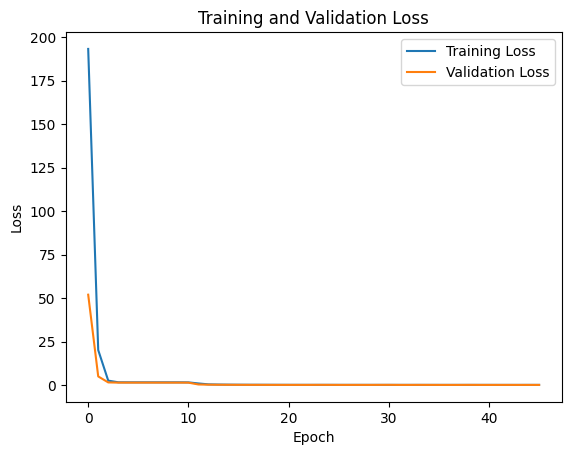

In [23]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Test Set:", mse)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [24]:
y_val_pred = model.predict(X_test)

71/71 [==============================] - 11s 15ms/step


In [26]:
# Assuming y_test and y_pred are the true and predicted values, respectively

# Calculate the absolute errors
errors = abs(y_val_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate accuracy
accuracy = 100 - np.mean(mape)

# Print the accuracy as a percentage
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 98.35%


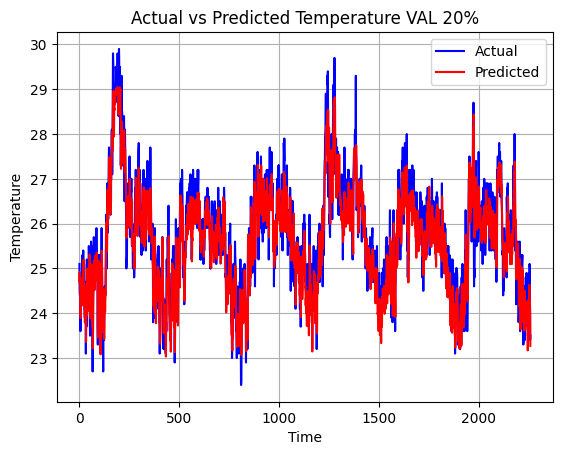

In [32]:
import matplotlib.pyplot as plt

# Assuming y_actual and y_predicted are the actual and predicted target values, respectively
# Assuming X_test is the feature data used for prediction

# Plot the actual values
plt.plot(y_test, label='Actual', color='blue')

# Plot the predicted values
plt.plot(y_val_pred, label='Predicted', color='red')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature VAL 20%')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [33]:
all_pred = model.predict(X)

353/353 [==============================] - 3s 9ms/step


In [40]:
import plotly.graph_objs as go
# Assuming 'array' is your numpy array and 'dates' is an array of dates corresponding to the values in 'array'
array = all_pred  # Replace with your actual array
array1 = y
dates = pd.date_range(start='1/1/1991',end ='12/31/2021', periods=len(array))  # Replace with your actual dates
dates1 = pd.date_range(start='1/1/1991',end ='12/31/2021', periods=len(array1))  # Replace with your actual dates


df = pd.DataFrame(array, index=dates, columns=['Value'])
df_resampled = df.resample('D').mean()


df1 = pd.DataFrame(array1, index=dates1, columns=['Value'])
df_resampled1 = df1.resample('D').mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_resampled.index, y=df_resampled['Value'], mode="lines", name='pred'))

# Plot actual temperature
fig.add_trace(go.Scatter(x=df_resampled1.index, y=df_resampled1['Value'], mode='lines', name='Actual Temperature'))

# Update layout
fig.update_layout(title='Actual vs Predicted Temperature',
                  xaxis_title='Date',
                  yaxis_title='Temperature (°C)')
fig.show()